# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

In [ ]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt


### Cargar datos

In [ ]:
# Carga el archivo de datos en un DataFrame
data = pd.read_csv('/datasets/vehicles_us.csv')


### Explorar datos iniciales

In [ ]:
# imprime la información general/resumida sobre el DataFrame
data.info()
print()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB

               price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750

In [ ]:
# imprimir una muestra de datos
data.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


A primera vista se observa que hay 51525 filas y 13 columnas. Hay Algunas columnas con datos ausentes como: model_year, cylinders, odometer, paint_color y is_4wd, los cuales tendrán que ser revisados para ver cual es el problema con los datos ausentes y reemplazarlos. Existen vehiculos con precio de $1, kilometraje igual a 0 y que son del año 1908. Los cuales necesitan también ser evaluados.

No se observan tipos de datos inapropiados.

La columna que tiene una mayor cantidad de valores ausentes es: is_4wd

Las conclusiones iniciales que se tienen son las siguientes:
1. El precio del vehículo depende directamente del kilometraje y la condición del mismo.
2. Existen fechas en las cuales el precio del vehiculo se ve afectado.

No se ve normal la columna "date_posted", no tiene una relación con la columna "days_listed". Al parecer la columna "date_posted" tiene fechas muy antiguas.

Se van a tratar los valores ausentes en cada columna con datos de la media o mediana según sea el caso o en el caso de que se necesite realizar un análisis adicional se lo hará. La columna "is_4wd" los valores ausentes corresponden a "0" o "False", para lo cual es un reemplazo de valores ausentes sencillo. Los datos de la columna "condition" se van a poner en escala numérica. Y se van a filtrar los datos para realizar gráficos y observar su interrelación.

## Tratar los valores ausentes (si hay)

### Columna is_4wd

En el caso de esta columna que tiene valores booleanos 1 = True, es lógico pensar que los valores ausentes corresponden a False, por eso razón se completaron los datos con "0".

In [ ]:
data['is_4wd'] = data['is_4wd'].fillna(0)

In [ ]:
data['is_4wd'].isna().sum()

0

### Columna model_year

En la columna 'model_year' se imputaran los datos relacionandolos con el modelo del auto.

In [ ]:
model_modelye = data.groupby('model')['model_year'].median()

In [ ]:
def modelye(row):
    model_year = row['model_year']
    model = row['model']

    if pd.isna(model_year):
        return model_modelye[model]
    else:
        return model_year

In [ ]:
print(modelye(data.loc[1]))

2011.0


In [ ]:
data['model_year'] = data.apply(modelye, axis=1)

In [ ]:
data['model_year'].isna().sum()

0

### Columna cylinders

La columna 'cylinders' se llenó con los valores de la mediana, la cual fue calculada con los valores de cada modelo de auto.

In [ ]:
print(data[data['cylinders'].isna()].head())

    price  model_year              model  condition  cylinders fuel  odometer  \
9    9200      2008.0        honda pilot  excellent        NaN  gas  147191.0   
36  10499      2013.0       chrysler 300       good        NaN  gas   88042.0   
37   7500      2005.0      toyota tacoma       good        NaN  gas  160000.0   
59   5200      2006.0  toyota highlander       good        NaN  gas  186000.0   
63  30000      1966.0       ford mustang  excellent        NaN  gas   51000.0   

   transmission         type paint_color  is_4wd date_posted  days_listed  
9     automatic          SUV        blue     1.0  2019-02-15           17  
36    automatic        sedan         NaN     0.0  2018-05-05           22  
37    automatic       pickup         NaN     0.0  2018-07-22           44  
59    automatic          SUV       green     0.0  2018-12-20            2  
63       manual  convertible         red     0.0  2019-01-23           17  


In [ ]:
model_cyl = data.groupby('model')['cylinders'].median()

In [ ]:
def cylin(row):
    cylinders = row['cylinders']
    model = row['model']

    if pd.isna(cylinders):
        return model_cyl[model]
    else:
        return cylinders

In [ ]:
print(cylin(data.loc[9]))

6.0


In [ ]:
data['cylinders'] = data.apply(cylin, axis=1)

In [ ]:
data['cylinders'].isna().sum()

0

### Columna odometer

Los valores ausentes para esta columna se imputaran en base a las columnas de model y model_year.

In [ ]:
columnas = ['odometer']
datos_imputacion = data.groupby(['model', 'model_year'])[columnas].mean().reset_index()

In [ ]:
def odom(row):
    model = row['model']
    model_year = row['model_year']
    odometer = row['odometer']
    if pd.isna(odometer):
        sub_conjunto = datos_imputacion.query('model==@model and model_year == @model_year')
        #if len(sub_conjunto) == 0:
            #return None
        new_odometer = sub_conjunto['odometer'].iloc[0]
        return new_odometer
    return odometer

In [ ]:
data['odometer'] = data.apply(odom, axis=1)

In [ ]:
data['odometer'].isna().sum()

83

In [ ]:
data = data.dropna(subset=['odometer']).reset_index()

In [ ]:
data['odometer'].isna().sum()

0

Después de aplicar la función quedaron 83 filas que no pudieron ser imputadas, debido a que model o model_year no pudo imputarse para obtener el valor de odometer. Entonces, estos valores ausentes corresponden al 0.16% y para manejar de mejor forma el dataframe se corresponde a eliminar estos datos.

### Columna paint_color

Esta columna tiene valores categóricos, por tal motivo reemplazaremos los valores ausentes por la cadena "paint", debido a que se consideró que no hay una manera correcta para inferir el color al relacionarlo con alguna otra columna.

In [ ]:
data['paint_color'] = data['paint_color'].fillna('paint')

In [ ]:
data['paint_color'].isna().sum()

0

## Corregir los tipos de datos

In [ ]:
data['model_year'] = data['model_year'].astype('int')
data['cylinders'] = data['cylinders'].astype('int')
data['odometer'] = data['odometer'].astype('int')
data['is_4wd'] = data['is_4wd'].astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51442 entries, 0 to 51441
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         51442 non-null  int64 
 1   price         51442 non-null  int64 
 2   model_year    51442 non-null  int64 
 3   model         51442 non-null  object
 4   condition     51442 non-null  object
 5   cylinders     51442 non-null  int64 
 6   fuel          51442 non-null  object
 7   odometer      51442 non-null  int64 
 8   transmission  51442 non-null  object
 9   type          51442 non-null  object
 10  paint_color   51442 non-null  object
 11  is_4wd        51442 non-null  int64 
 12  date_posted   51442 non-null  object
 13  days_listed   51442 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 5.5+ MB


## Enriquecer datos

In [ ]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
data['day_posted']=pd.DatetimeIndex(data['date_posted']).day
data['month_posted']=pd.DatetimeIndex(data['date_posted']).month
data['year_posted']=pd.DatetimeIndex(data['date_posted']).year

In [ ]:
# Agrega los años del vehículo cuando el anuncio se colocó
data['car_year_posted'] = data['year_posted'] - data['model_year']

In [ ]:
# Agrega el millaje promedio del vehículo por año
data['odom_year'] = data['odometer'] / data['car_year_posted']

In [ ]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
def condit(condition):
    if condition == 'new':
        return 5
    if condition == 'like new':
        return 4
    if condition == 'excellent':
        return 3
    if condition == 'good':
        return 2
    if condition == 'fair':
        return 1
    return 0



In [ ]:
data['condition'] = data['condition'].apply(condit)

## Comprobar datos limpios

In [ ]:
# imprime la información general/resumida sobre el DataFrame
data.describe()

,index,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_posted,month_posted,year_posted,car_year_posted,odom_year
count,51442.000000,51442.00000,51442.000000,51442.000000,51442.000000,51442.000000,51442.000000,51442.000000,51442.000000,51442.000000,51442.000000,51442.000000,5.144000e+04
mean,25762.760157,12116.03919,2009.807881,2.637592,6.120718,115528.524746,0.496890,39.557949,15.449322,6.628902,2018.307414,8.499533,inf
std,14873.030414,10021.53735,6.045080,0.712422,1.658029,62443.006440,0.499995,28.212563,8.737041,3.474159,0.461427,6.059098,NaN
min,0.000000,1.00000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,0.000000,0.000000e+00
25%,12885.250000,5000.00000,2007.000000,2.000000,4.000000,72757.000000,0.000000,19.000000,8.000000,3.000000,2018.000000,4.000000,1.105566e+04
50%,25759.500000,9000.00000,2011.000000,3.000000,6.000000,114479.000000,0.000000,33.000000,15.000000,7.000000,2018.000000,8.000000,1.544444e+04
75%,38641.750000,16800.00000,2014.000000,3.000000,8.000000,153000.000000,1.000000,53.000000,23.000000,10.000000,2019.000000,12.000000,2.238206e+04
max,51524.000000,375000.00000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.000000,31.000000,12.000000,2019.000000,110.000000,inf


In [ ]:
# imprimir una muestra de datos
data.head()


,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_year_posted,odom_year
0,0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,paint,1,2018-06-23,19,23,6,2018,7,20714.285714
1,1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,19,10,2018,7,12672.142857
2,2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,7,2,2019,6,18333.333333
3,3,1500,2003,ford f-150,1,8,gas,175165,automatic,pickup,paint,0,2019-03-22,9,22,3,2019,16,10947.812500
4,4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2,4,2019,2,40451.500000


### Precio

In [ ]:
price_median = data.pivot_table(index='model', values = 'price', aggfunc='median')

### Los años del vehículo cuando el anuncio se colocó

In [ ]:
car_year_median = data.pivot_table(index='model', values = 'car_year_posted', aggfunc='median')

### Millaje

In [ ]:
odom_median = data.pivot_table(index='model', values = 'odometer', aggfunc='median')

### Número de cilindros

In [ ]:
cylin_median = data.pivot_table(index='model', values = 'cylinders', aggfunc='median')

### Estado

In [ ]:
cond_median = data.pivot_table(index='model', values = 'condition', aggfunc='median')

### Todos los gráficos en una sola función

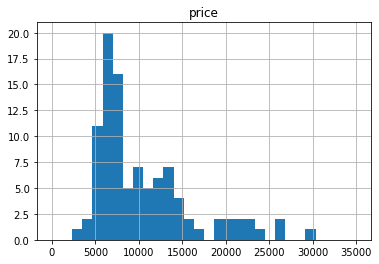

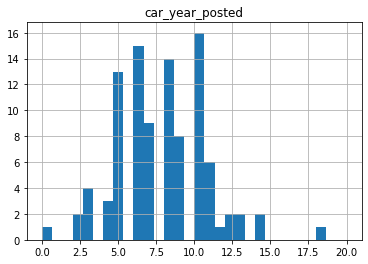

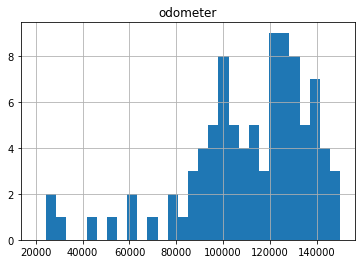

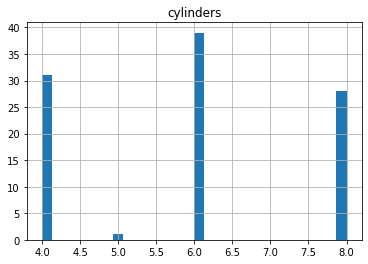

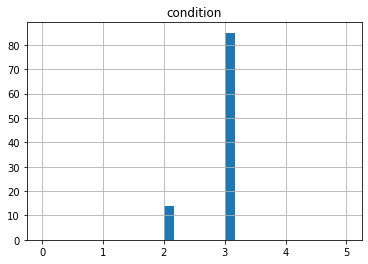

In [ ]:
def plot_histogram(data, column, bins, range=None):
    data.hist(column, bins=bins, range=range)

plot_histogram(price_median, 'price', 30, (0,35000))
plot_histogram(car_year_median, 'car_year_posted', 30, (0,20))
plot_histogram(odom_median, 'odometer', 30, (20000,150000))
plot_histogram(cylin_median, 'cylinders', 30)
plot_histogram(cond_median, 'condition', 30, (0,5))


- El gráfico del precio alcanzo su máximo entre 5000 y 7500, hay unos pocos valores que van mas allá de los $25000.
- El gráfico de los años del vehiculo posteado alcanzó su máximo entre 5 y 12 años, hay unos pocos valores que van mas allá de los 13 años.
- El gráfico del kilometraje alcanza su máximo entre los 100000 a 120000 kilómetros, tiene valores mas bajos, pero son pocos.
- El gráfico de los cilindros de los autos nos muestra que hay una mayor cantidad de autos con 6 cilindros, y le siguen los de 4 y 8 cilindros.
- El gráfico de la condición de los vehiculos alcanzó su máximo en 3, eso quiere decir que la mayor cantidad de vehiculos tiene un estado de excelente, pocos autos con estado de como nuevo.

### Price

In [ ]:
# Determina los límites inferiores para valores atípicos
q1_price = data['price'].quantile(0.25)
q3_price = data['price'].quantile(0.75)
iqr_price = q3_price - q1_price

linf_price = q1_price-1.5*iqr_price
linf_price

-12700.0

In [ ]:
# Determinar los límites superiores para valores atípicos
lsup_price = q3_price + 1.5*iqr_price
lsup_price

34500.0

In [ ]:
# Almacena los datos sin valores atípicos en un DataFrame separado
price_atip = data.query('price <= @lsup_price')


### Odometer

In [ ]:
# Determina los límites inferiores para valores atípicos
q1_odom = data['odometer'].quantile(0.25)
q3_odom = data['odometer'].quantile(0.75)
iqr_odom = q3_odom - q1_odom

linf_odom = q1_odom-1.5*iqr_odom
linf_odom

-47607.5

In [ ]:
# Determinar los límites superiores para valores atípicos
lsup_odom = q3_odom + 1.5*iqr_odom
lsup_odom

273364.5

In [ ]:
# Almacena los datos sin valores atípicos en un DataFrame separado
odom_atip = data.query('odometer <= @lsup_odom')


In [ ]:
both_data = pd.merge(price_atip, odom_atip)
both_data

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_year_posted,odom_year
0,0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,paint,1,2018-06-23,19,23,6,2018,7,20714.285714
1,1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,19,10,2018,7,12672.142857
2,2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,7,2,2019,6,18333.333333
3,3,1500,2003,ford f-150,1,8,gas,175165,automatic,pickup,paint,0,2019-03-22,9,22,3,2019,16,10947.812500
4,4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2,4,2019,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49207,51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,3,10,2018,5,17627.200000
49208,51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,14,11,2018,16,11343.750000
49209,51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,15,11,2018,9,14222.222222
49210,51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,2,7,2018,5,27914.600000


<AxesSubplot:>

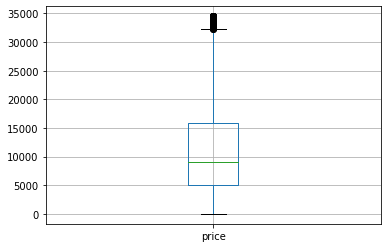

In [ ]:
both_data.boxplot('price')

## Estudiar parámetros principales sin valores atípicos

Adicional al análisis por cuartile que se realizó, se eliminarán los valores atípicos que corresponden a:
- Precios de autos con un valor inferior a $10. A pesar de que pueden ser autos que se encuentren en muy mal estado es un valor demasiado bajo para poder considerarlos.
- Kilometraje de autos inferior a 2000 kilómetros. Porque es muy poco probable que los autos puedan tener esa cantidad de kilómetros a pesar de que sean comprados en años recientes.
Se realiza esto porque el porcentaje de datos eliminados es muy baja en comparación con el tamaño de todo el dataframe.

In [ ]:
both_data.drop(both_data[(both_data['price'] < 50)].index, inplace=True)

In [ ]:
both_data.drop(both_data[(both_data['odometer'] < 2000)].index, inplace=True)

"both_data" contiene el nuevo dataframe sin valores atípicos.

In [ ]:
price_median_atip = both_data.pivot_table(index='model', values = 'price', aggfunc='median')
odom_median_atip = both_data.pivot_table(index='model', values = 'odometer', aggfunc='median')

In [ ]:
#HISTOGRAMA SIN DATOS ATÍPICOS

def plot_histogram_atip(both_data, column, bins, range=None):
    both_data.hist(column, bins=bins, range=range)

#plot_histogram_atip(price_median_atip, 'price', 30, (0,25000))
#plot_histogram_atip(odom_median_atip, 'odometer', 30, (20000,150000))

<AxesSubplot:>

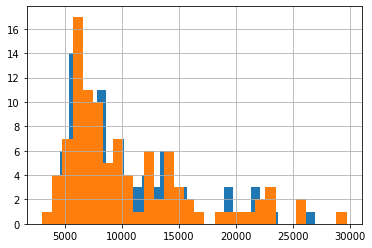

In [ ]:
price_median_atip['price'].hist(bins=30)
price_median['price'].hist(bins=30)

<AxesSubplot:>

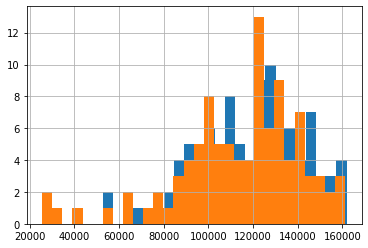

In [ ]:
odom_median_atip['odometer'].hist(bins=30)
odom_median['odometer'].hist(bins=30)

In [ ]:
#HISTOGRAMA CON DATOS ATÍPICOS

#plot_histogram(price_median, 'price', 30, (0,35000))
#plot_histogram(odom_median, 'odometer', 30, (20000,150000))

No se observa mayor diferencia entre los histogramas con datos atípicos(naranja) y los que no estan con datos atípicos(azul). debido a que el porcentaje de datos eliminados fue del 8.6%.

## Periodo de colocación de los anuncios

Usualmente el periodo de tiempo que dura los anuncion se encuentra entre 19 y 53 dias. Con un valor de la mediana igual a 33 días. Se tiene valores atípicos superiores a este rango, llegando a tener una máxima de 271 días.

In [ ]:
both_data['days_listed'].describe()

count    47597.000000
mean        39.576108
std         28.246107
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

3 de cada 4 autos se venden en 53 días, el cual es el tiempo de colocación habitual de los anuncios. La media es 39 días y la mediana 33 días.

<AxesSubplot:>

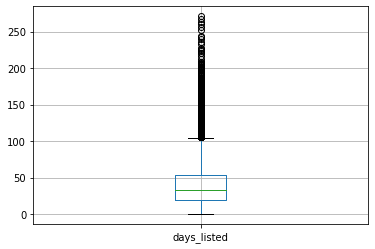

In [ ]:
both_data.boxplot('days_listed')

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

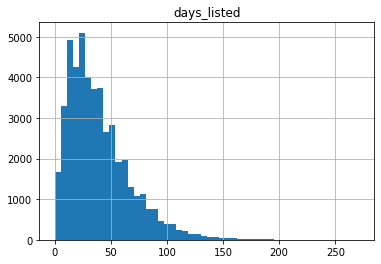

In [ ]:
both_data.hist('days_listed', bins = 50)

In [ ]:
days_sup = both_data.query('days_listed >= 60')
days_sup.describe()

,index,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_posted,month_posted,year_posted,car_year_posted,odom_year
count,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9.499000e+03
mean,25954.381935,11419.550058,2009.694915,2.628277,6.054848,118092.046531,0.483840,84.362670,15.427203,6.561428,2018.315402,8.620486,inf
std,14981.490796,7711.531502,5.771294,0.703183,1.646171,53901.152029,0.499765,24.173178,8.760425,3.479581,0.464700,5.785497,NaN
min,2.000000,69.000000,1955.000000,0.000000,3.000000,2121.000000,0.000000,60.000000,1.000000,1.000000,2018.000000,0.000000,9.393182e+01
25%,12939.000000,5285.000000,2007.000000,2.000000,4.000000,80153.000000,0.000000,67.000000,8.000000,3.000000,2018.000000,5.000000,1.112080e+04
50%,26135.000000,9250.000000,2011.000000,3.000000,6.000000,118000.000000,0.000000,77.000000,15.000000,7.000000,2018.000000,8.000000,1.531133e+04
75%,38982.000000,15995.000000,2014.000000,3.000000,8.000000,153228.000000,1.000000,94.000000,23.000000,10.000000,2019.000000,12.000000,2.162690e+04
max,51523.000000,34500.000000,2019.000000,5.000000,10.000000,273237.000000,1.000000,271.000000,31.000000,12.000000,2019.000000,63.000000,inf


In [ ]:
days_min = both_data.query('days_listed <= 60')
days_min.describe()

,index,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_posted,month_posted,year_posted,car_year_posted,odom_year
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,3.844400e+04
mean,25785.313651,11383.568125,2009.640880,2.620305,6.047498,118222.210930,0.478150,28.693762,15.454609,6.646681,2018.305379,8.664499,inf
std,14890.302290,7755.393595,5.827293,0.702551,1.632456,54443.741921,0.499529,15.268557,8.733687,3.473393,0.460574,5.840430,NaN
min,0.000000,65.000000,1908.000000,0.000000,3.000000,2000.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,0.000000,5.484615e+01
25%,12921.750000,5200.000000,2007.000000,2.000000,4.000000,79648.250000,0.000000,16.000000,8.000000,3.000000,2018.000000,5.000000,1.111221e+04
50%,25779.000000,8999.000000,2011.000000,3.000000,6.000000,118224.000000,0.000000,27.000000,15.000000,7.000000,2018.000000,8.000000,1.525000e+04
75%,38696.250000,15995.000000,2014.000000,3.000000,8.000000,154000.000000,1.000000,40.000000,23.000000,10.000000,2019.000000,12.000000,2.165750e+04
max,51524.000000,34500.000000,2019.000000,5.000000,12.000000,273335.000000,1.000000,60.000000,31.000000,12.000000,2019.000000,110.000000,inf


Se relacionaron las diferentes columnas con valores superiores e inferiores a 60 días para encontrar la razón por la cual se eliminaron rápidamente y se quedaron bastante tiempo los anuncios pero no se encontró una relación para estos datos. Por tal motivo esta pregunta se encuentra fuera de mi alcance encontrar el razonamiento para poder responderla.

## Precio promedio por cada tipo de vehículo

In [ ]:
listed_prom=both_data.pivot_table(index='type', values=['days_listed', 'price'], aggfunc=['count', 'mean'])
listed_prom.columns=['count_days', 'count_price','mean_days', 'mean_price']
listed_prom=listed_prom.drop(['count_price','mean_days'], axis=1)
listed_prom

,count_days,mean_price
type,,
SUV,11568,10662.964039
bus,24,17135.666667
convertible,404,12814.113861
coupe,2093,13841.356904
hatchback,1002,6955.351297
mini-van,1132,8079.393110
offroad,198,13352.883838
other,240,10538.404167
pickup,6378,14902.116181


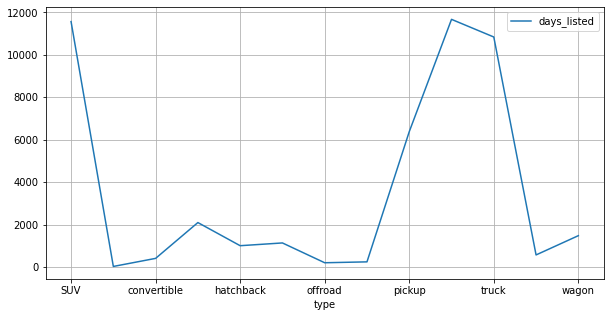

In [ ]:
(both_data
.pivot_table(index='type', values='days_listed', aggfunc='count')
.plot(grid=True, figsize=(10,5))
)
plt.show()

In [ ]:
listed_prom.query('count_days >= 11568')

,count_days,mean_price
type,,
SUV,11568,10662.964039
sedan,11674,7044.877848


Los tipos de vehiculo con una mayor cantidad de dias anunciados son "SUV" y "SEDAN"

## Factores de precio

### SUV

            condition  model_year  odometer     price
condition    1.000000    0.076097 -0.226152  0.173015
model_year   0.076097    1.000000 -0.658033  0.130740
odometer    -0.226152   -0.658033  1.000000 -0.329164
price        0.173015    0.130740 -0.329164  1.000000


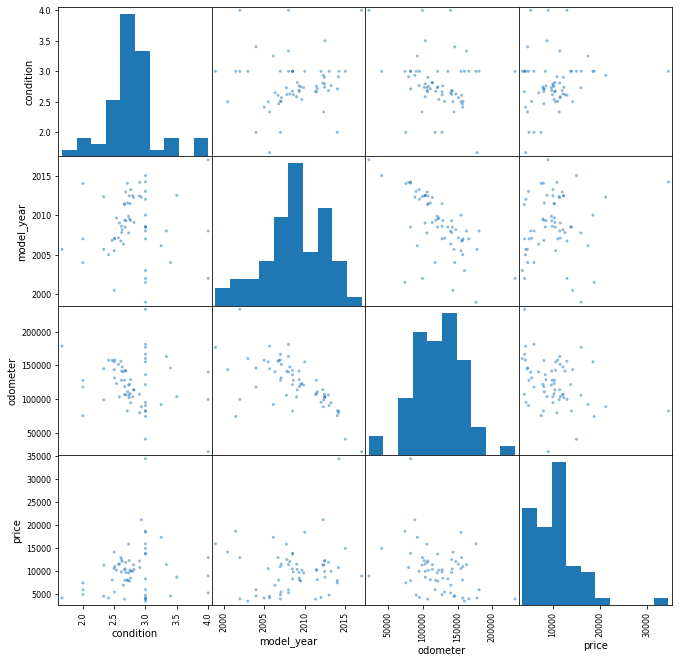

In [ ]:
type_suv = both_data.query('type == "SUV"')
type_multi_suv = type_suv.pivot_table(index='model', values=['price', 'model_year', 'odometer', 'condition',])
print(type_multi_suv.corr())
pd.plotting.scatter_matrix(type_multi_suv, figsize=(11,11))
plt.show()

<Figure size 432x288 with 0 Axes>

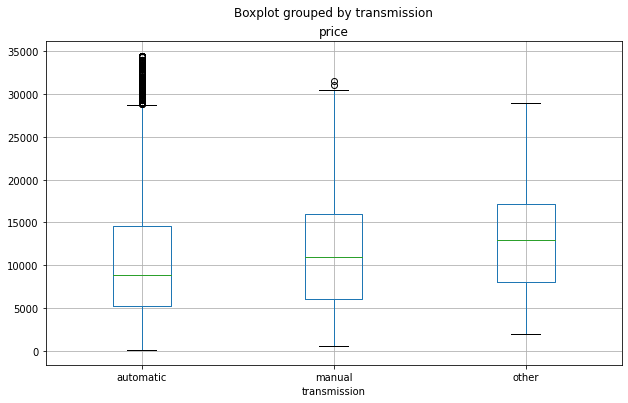

In [ ]:
plt.figure()
type_suv.boxplot(column='price', by='transmission', figsize=(10,6))
plt.show()

<Figure size 432x288 with 0 Axes>

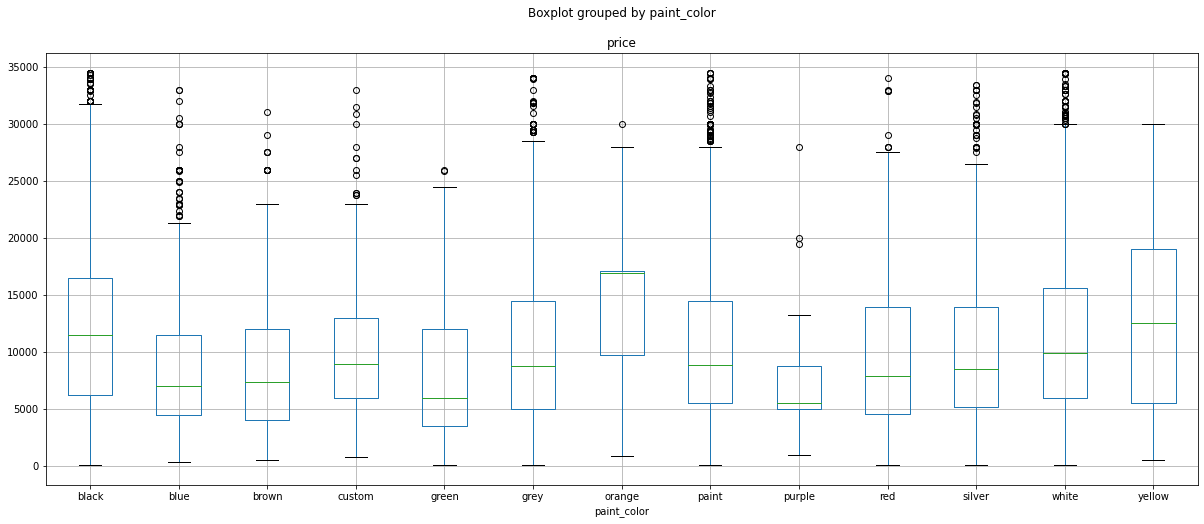

In [ ]:
plt.figure()
type_suv.boxplot(column='price', by='paint_color',figsize=(20,8))
plt.show()

Para los autos tipo SUV se tiene la correlación mas fuerte entre el kilometraje y el precio con un valor de -0.32. Y le sigue la correlación entre el año del auto y el precio con un valor moderado de 0.13.
Para este tipo de autos si depende el precio del kilometraje y el año del auto.
Para el caso de las variables categóricas, en el caso de la transmisión no existe una mayor diferencia entre unas y otras. En el caso del color hay unas ligeras diferencias como es el caso del color anaranjado, el cual tiene autos con el mayor precio y los demás se encuentran en valores entre 5000 y 10000 .

### Sedan

            condition  model_year  odometer     price
condition    1.000000    0.351459  0.044329  0.222130
model_year   0.351459    1.000000 -0.248795  0.310678
odometer     0.044329   -0.248795  1.000000 -0.044139
price        0.222130    0.310678 -0.044139  1.000000


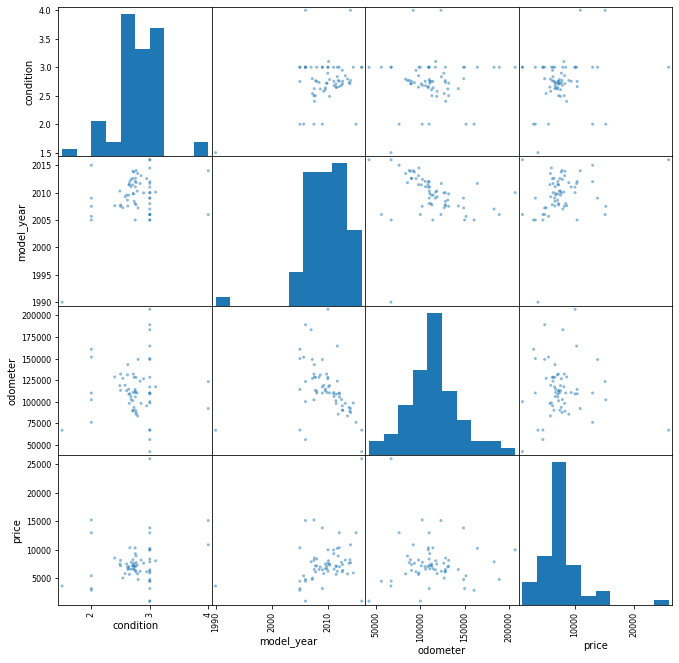

In [ ]:
type_sedan = both_data.query('type == "sedan"')
type_multi_sedan = type_sedan.pivot_table(index='model', values=['price', 'model_year', 'odometer', 'condition',])
print(type_multi_sedan.corr())
pd.plotting.scatter_matrix(type_multi_sedan, figsize=(11,11))
plt.show()

<Figure size 432x288 with 0 Axes>

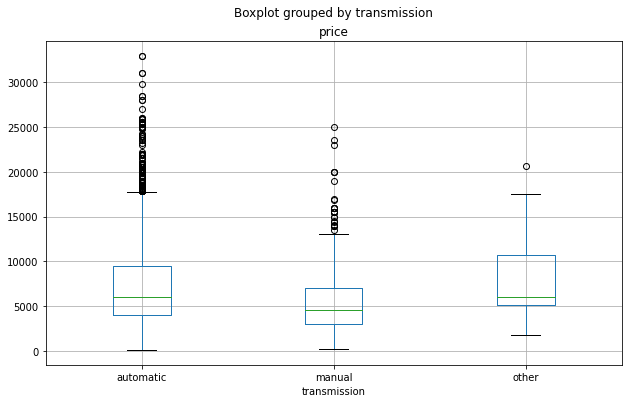

In [ ]:
plt.figure()
type_sedan.boxplot(column='price', by='transmission', figsize=(10,6))
plt.show()

<Figure size 432x288 with 0 Axes>

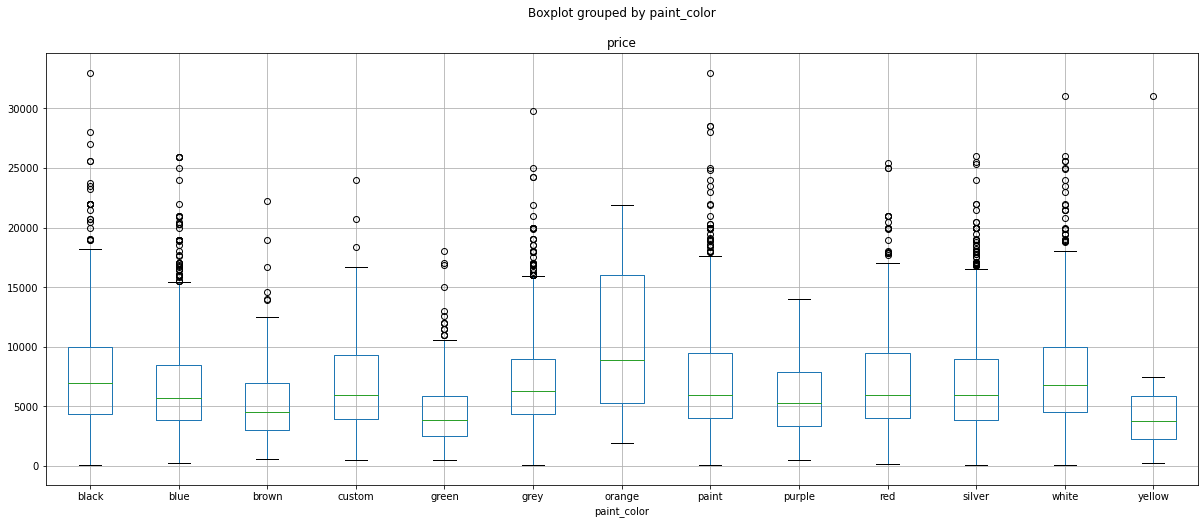

In [ ]:
plt.figure()
type_sedan.boxplot(column='price', by='paint_color',figsize=(20,8))
plt.show()

Para los autos tipo Sedan el factor que más impacta sobre el precio es el año del modelo con una correlación de 0.31, seguido por la condición con una correlación de 0.22.

Para el caso de las variables categóricas, en el caso de la transmisión no existe una mayor diferencia entre unas y otras. En el caso del color hay unas ligeras diferencias, pero en su gran mayoria no existe una diferencia significativa entre los colores de los autos.

## Conclusión Final

Se revisaron los datos iniciales teniendo algunas columnas con valores ausentes como: model_year, cylinders, odometer, paint_color. Los cuales fueron tratados e imputados según fuera el caso. Para algunas casos se cree que existió un mal ingreso de datos por parte de las personas que publicaron sus autos, lo cual llegó a dar esos valores ausentes. Al llenar los valores ausentes se corrigieron los tipos de datos, especialmente se pasaron los datos a tipo integer para poder manejarlos de mejor forma. Una vez limpiado los datos y teniendo datos correctos se procedió a la evaluación, realizando histogramas con datos atípicos y sin ellos; sin embargo, no existió mayor diferencia entre uno y otro. En la evaluación del periodo de colocación de anuncios se tuvo lo siguiente: 3 de cada 4 autos se venden en 53 días, el cual es el tiempo de colocación habitual de los anuncios. La media es 39 días y la mediana 33 días. Los autos que tuvieron una mayor cantidad de dias anunciados fueron los tipos SUV y Sedan y para el precio dependieron directamente de factores como el kilometraje, la condición y el año del auto.
Esto significa que hay una correlación positiva entre el año del modelo y el precio, lo que sugiere que los modelos más nuevos tienden a tener precios más altos que los modelos más antiguos. Por otro lado, también hay una correlación positiva entre la condición y el precio, lo que sugiere que los vehículos en mejor estado tienden a tener precios más altos que los vehículos en peor estado. Autos con un mayor kilometraje tienden a tener precios mas bajos que el resto.